# **Yulu** 🏍
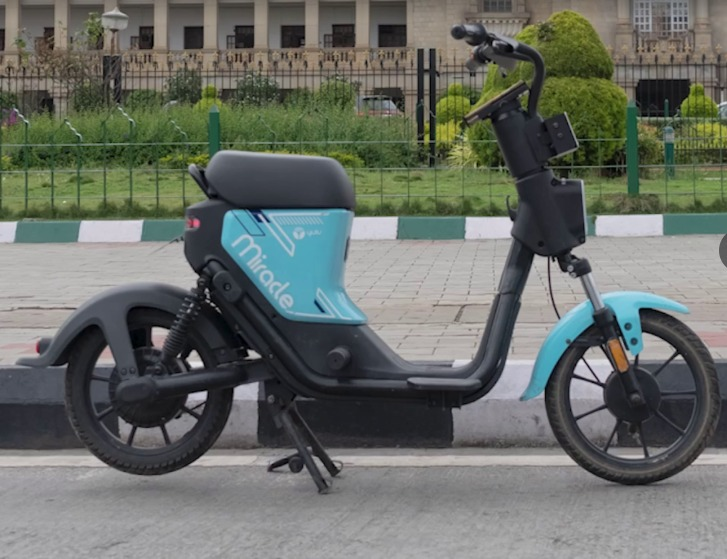

**Business Problem**

Yulu has experienced significant declines in its earnings lately. In response, they've engaged a consulting firm to analyze the variables that influence the demand for their shared electric cycles. Their focus is specifically on comprehending the factors that impact the demand for these shared electric cycles in the Indian market.    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cl
import statistics as st
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm,t, binom,ttest_ind, ttest_rel, f_oneway, chisquare
from datetime import datetime

In [ ]:
df_yulu= pd.read_csv("/content/yulu_dataset.csv")
df_yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**The dataset consists of 10,886 rows and includes 12 different features.**

In [ ]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_yulu.shape

(10886, 12)

In [ ]:
df_yulu.size

130632

In [ ]:
df_yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**No missing values were found in the dataset.**

In [ ]:
df_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Converting Datetime format

In [ ]:
df_yulu["datetime"] = pd.to_datetime(df_yulu["datetime"])  # converting datetime format
cat_cols = ["season","holiday","workingday","weather"] # List of categorical columns
for i in cat_cols:
    df_yulu[i] = df_yulu[i].astype("object")

In [ ]:
#creating seperate columns for hour,month,year
df_yulu["hour"]=df_yulu["datetime"].dt.hour
df_yulu["month"]=df_yulu["datetime"].dt.month
df_yulu["year"]=df_yulu["datetime"].dt.year
df_yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,12,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,12,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,12,2012


In [ ]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  year        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 1.

In [ ]:
# Understanding the distribution of categorical variables
df_yulu[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df_yulu)

value
variable   value          
holiday    0      0.971431
           1      0.028569
season     1      0.246739
           2      0.251056
           3      0.251056
           4      0.251148
weather    1      0.660665
           2      0.260334
           3      0.078909
           4      0.000092
workingday 0      0.319125
           1      0.680875

**There are four distinct seasons and weather conditions in the dataset.**

In [ ]:
#minimum and maximum date
print('The minimum date in the given dataset :' , df_yulu['datetime'].min())
print('The maximum date in the given dataset :' , df_yulu['datetime'].max())

The minimum date in the given dataset : 2011-01-01 00:00:00
The maximum date in the given dataset : 2012-12-19 23:00:00


In [ ]:
df_yulu.groupby(df_yulu["season"])["count"].count()

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

**Univariate Analysis**

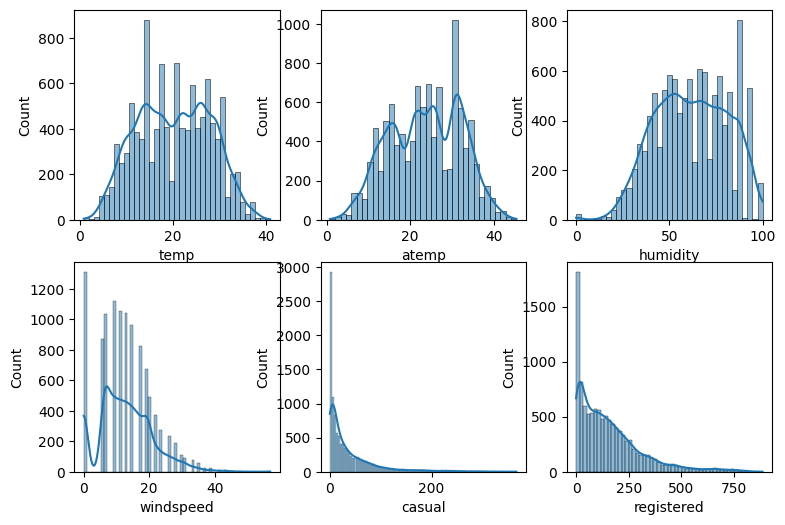

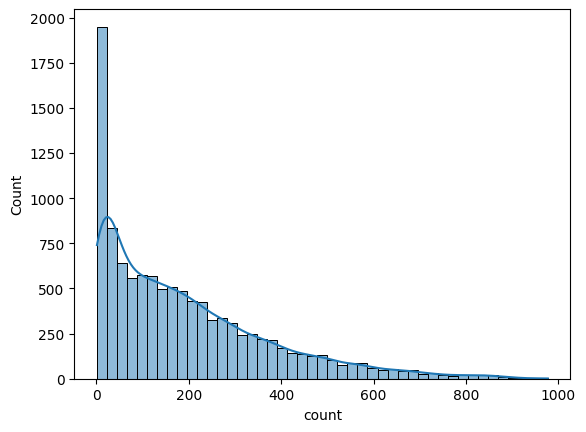

In [ ]:
# understanding the distribution for numerical variables using histogram
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(9, 6),)
i = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df_yulu[num_cols[i]], ax=axis[row, col], kde=True)
        i += 1
plt.show()
sns.histplot(df_yulu[num_cols[-1]], kde=True)
plt.show()

**Observations:**
1. The columns : temp, atemp and humidity looks like they follow Normal Distribution.
2. The columns : casual ,registered and count looks like they follow Log-Normal Distribution and are right skewed.
3. The windspeed follows Binomial Distribution.

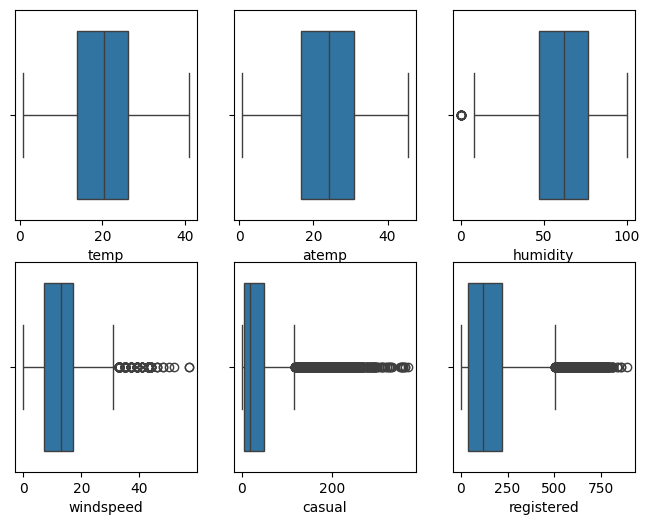

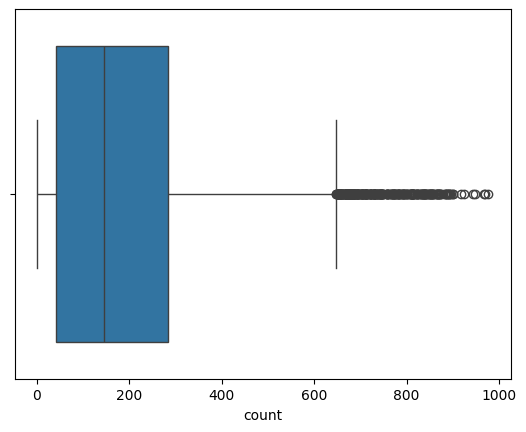

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
i = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df_yulu[num_cols[i]], ax=axis[row, col])
        i += 1
plt.show()
sns.boxplot(x=df_yulu[num_cols[-1]])
plt.show()

**Observations: Humidity, Casual, Registered and Count have outliers in the dataset**


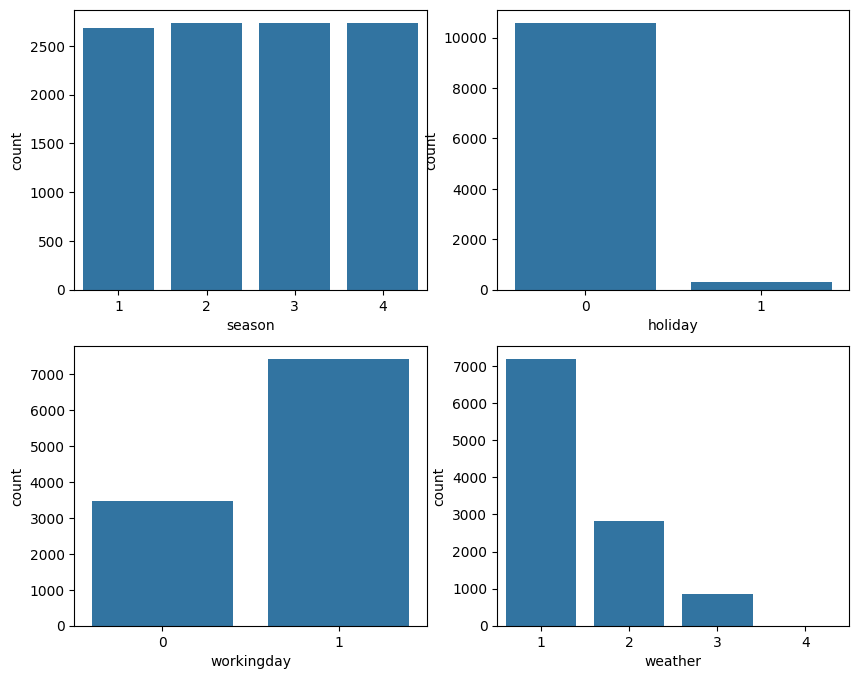

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
i = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df_yulu, x=cat_cols[i], ax=axis[row, col])
        i += 1
plt.show()

**Observations:**
1. Most of the cycles where rented on working days probably because it is an easy mode of transport
2. Looks like all season have almost equal no of rented cycles.
3. Whenever its a holiday ,cycles seem to be more in demand.
4. Most cycles are rented on days with clear sky or partly cloudy days
5. The demand for cycles on extreme weather conditions like heavy rainy days with thunderstorm, mist, snow or fog is very very less.


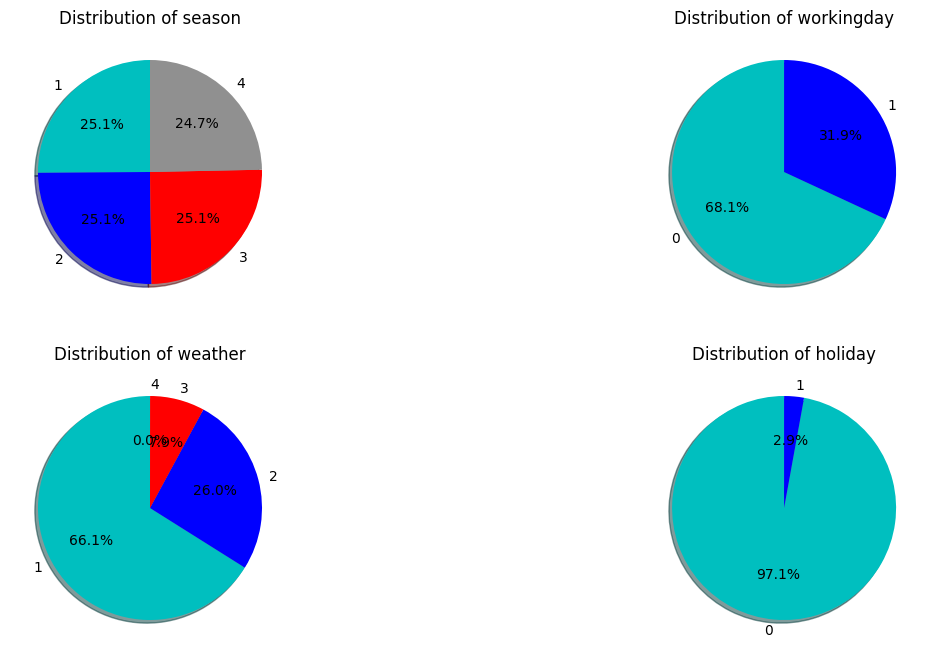

In [ ]:
plt.figure(figsize=(15, 8))
cols = ['c', 'b', 'r', '#909090']
plt.subplot(2,2,1)
plt.pie(df_yulu["season"].value_counts(),labels=df_yulu["season"].unique(),colors=cols,autopct='%1.1f%%', startangle = 90, shadow = True)
plt.title("Distribution of season")
plt.subplot(2,2,2)
plt.pie(df_yulu["workingday"].value_counts(),labels=df_yulu["workingday"].unique(),colors=cols,autopct='%1.1f%%', startangle = 90, shadow = True)
plt.title("Distribution of workingday")
plt.subplot(2,2,3)
plt.pie(df_yulu["weather"].value_counts(),labels=df_yulu["weather"].unique(),colors=cols,autopct='%1.1f%%', startangle = 90, shadow = True)
plt.title("Distribution of weather")
plt.subplot(2,2,4)
plt.pie(df_yulu["holiday"].value_counts(),labels=df_yulu["holiday"].unique(),colors=cols,autopct='%1.1f%%', startangle = 90, shadow = True)
plt.title("Distribution of holiday")
plt.show()

**Insights**

• The data of season is evenly distributed as we can see the % of data is almost 25 for each group

• for weekday 31.9% data is present and remaining percentage is of weekend or
holiday

• based on weather we can see only 1 row is present which is negligible so we
removed that row for doing our hypothesis testing

• For holiday most of the data is of not holiday only 2.9% data is of a holiday




# **Bivariate Analysis**


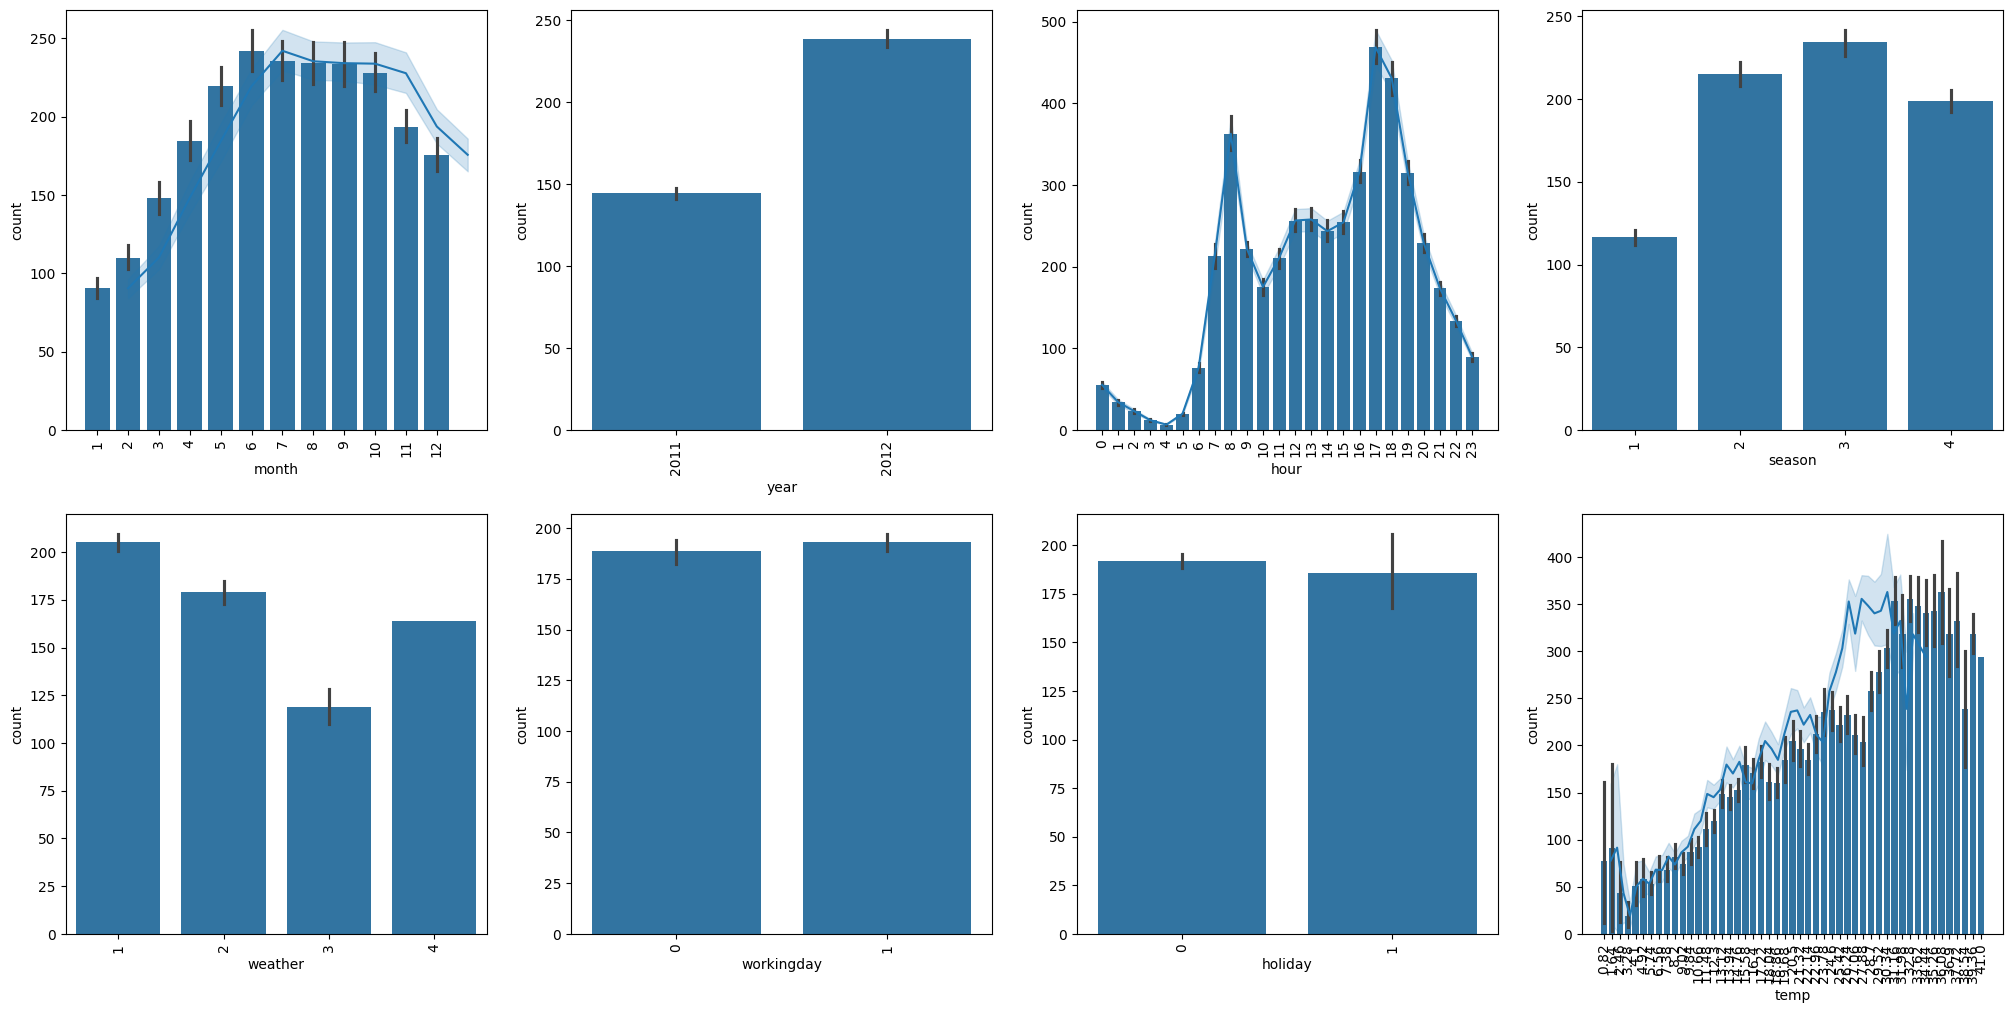

In [ ]:
a=["month","year","hour","season","weather","workingday","holiday","temp"]
plt.figure(figsize=(25, 12))
cols = ['c', 'b', 'r', '#909090']
for i in range(len(a)):
    plt.subplot(2,4,i+1)
    sns.barplot(x=df_yulu[a[i]],y=df_yulu["count"])
    if df_yulu[a[i]].nunique()>5:
        sns.lineplot(x=df_yulu[a[i]],y=df_yulu["count"])
    plt.xticks(rotation=90)
plt.show()


**Insights**

• Most of the bikes rented in the month range of [may-october] and we can see that very less bikes rented in january comparing to other months

• most bikes rented in 2012 than 2011 which tells us the improvement of business

• Mostly bikes are rented in the evening [4-7]PM and in morning[7-9]AM

• When the weather is clear most of the bikes are rented when the climate getting towards rain the rented bikes count is going down

• Mostly working day and non working day has almost same count of rented bikes
even it is followed in holiday or weekday also

• [30-36] degree celcius most of the rent bikes count is there

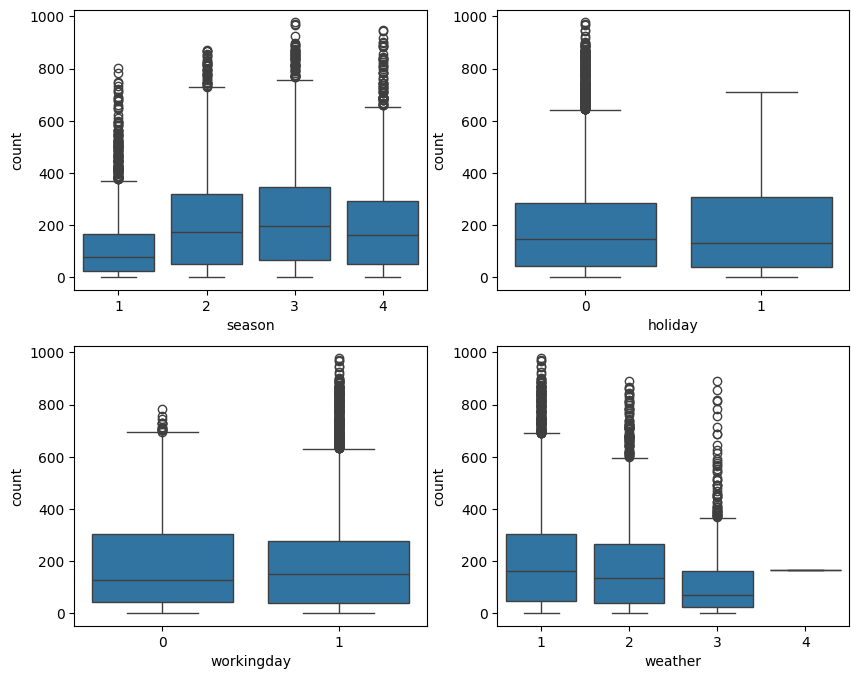

In [ ]:
#Relationships between variables such as workday and count, season and count, weather and count
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
i = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df_yulu, x=cat_cols[i], y='count', ax=axis[row, col])
        i += 1
plt.show()

**Observations:**
1. If its an holidays then more cycles are rented.
2. Fall(3) and Summer(2) seem to be have more demand for shared electric cycles as compared to other seasons
3. It is also clear from the above plot that whenever it is a holiday or weekend, slightly more bikes were rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
5. All the four variables have outliers


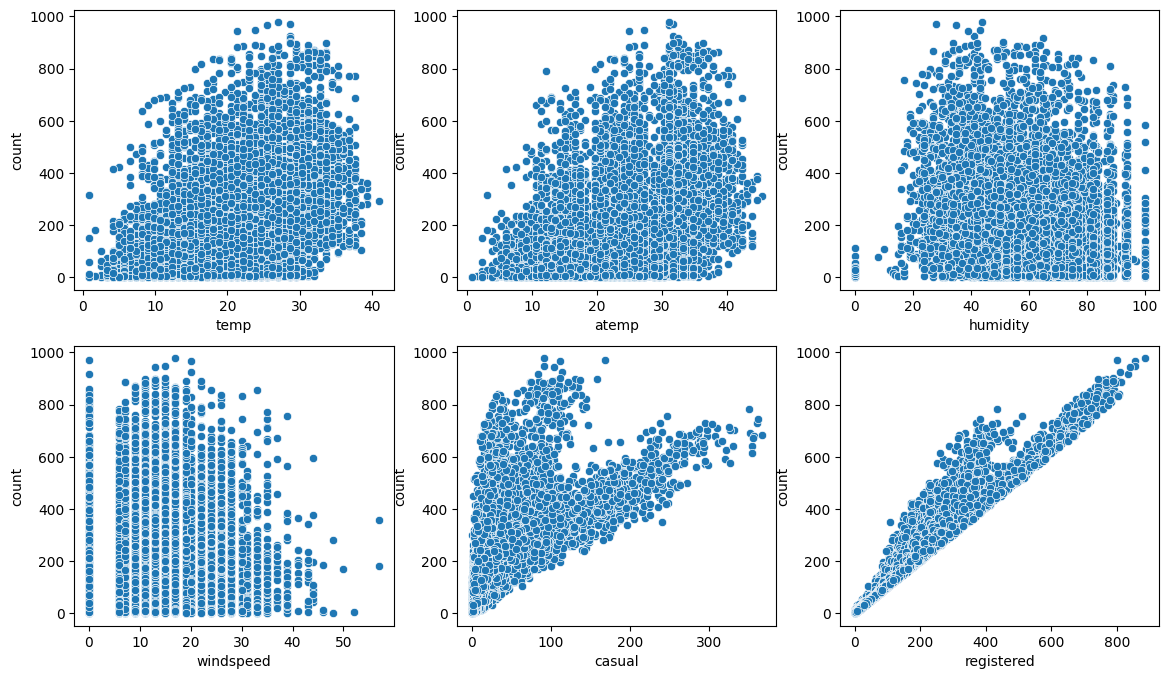

In [ ]:
# plotting numerical variables against count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
i = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df_yulu, x=num_cols[i], y='count', ax=axis[row, col])
        i += 1
plt.show()

**Observations:**
1. Whenever the humidity is less than 20, number of bikes rented is very very low
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 35, number of bikes rented is less.
4. We can see from the above graph that registered variable follows a perfect linear trend. Casual is seen following linear relation with count
variable
5. All the 4 categorical variables have outliers.


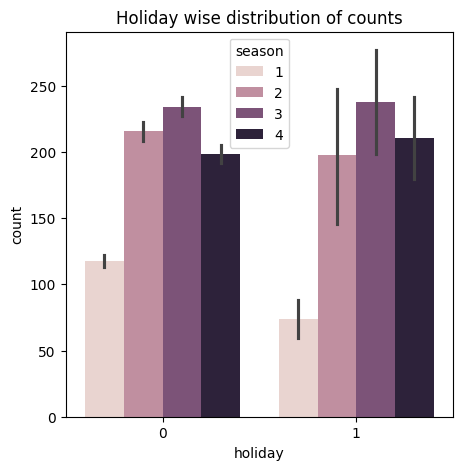

In [ ]:
#Barplot for Holiday distribution of counts
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df_yulu,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

In [ ]:
df_yulu.corr()['count']

<ipython-input-25-ba9ced1f72e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_yulu.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
hour          0.400601
month         0.166862
year          0.260403
Name: count, dtype: float64

<ipython-input-26-6be1cf904945>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_yulu.corr(), annot=True)


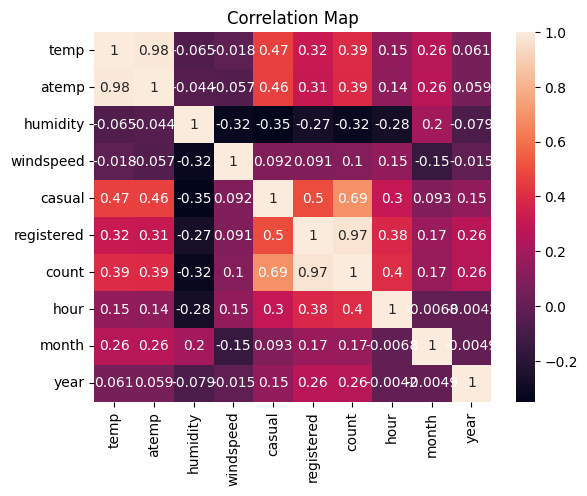

In [ ]:
# heat plot for understanding of correlation between numerical variables
sns.heatmap(df_yulu.corr(), annot=True)
plt.title("Correlation Map")
plt.show()

The negative value of humidity indicates that count variable and humidity are highly correlated in negative direction and other numerical
variables are positively correlated with count variable.


# **Hypothesis Testing**

In [ ]:
#TTEST for the cat vs numerical data having 1 or 2 categories
#test on Workingday and count
H0="working day has no effect of number of vehicels rented on yulu bikes"
Ha="working day has effect of number of vehicels rented on yulu bikes"
a=df_yulu[df_yulu["workingday"]==0]["count"]
b=df_yulu[df_yulu["workingday"]==1]["count"]
alpha=0.05
stat,p=stats.ttest_ind(a,b)
print(stat)
print(p)
if p < alpha:
    print("Reject H0 = So",Ha)
else:
    print("Fail to reject H0 = So",H0)

-1.2096277376026694
0.22644804226361348
Fail to reject H0 = So working day has no effect of number of vehicels rented on yulu bikes


-1.2105985511265596

0.22607559007082925

Fail to reject H0 = So working day has no effect of number of vehicels
rented on yulu bikes bold text bold text

In [ ]:
# test on year and count
H0="year has no effect of number of vehicels rented on yulu bikes"
Ha="year has effect of number of vehicels rented on yulu bikes"
a=df_yulu[df_yulu["year"]==2011]["count"]
b=df_yulu[df_yulu["year"]==2012]["count"]
alpha=0.05
stat,p=stats.ttest_ind(a,b)
print(stat)
print(p)
if p < alpha:
 print("Reject H0 = So",Ha)
else:
 print("Fail to reject H0 = So",H0)

-28.137693674450425
3.2420142331759836e-168
Reject H0 = So year has effect of number of vehicels rented on yulu bikes


-28.137693674450425

3.2420142331759836e-168

Reject H0 = So year has effect of number of vehicels rented on yulu bikes

In [ ]:
#test on Holiday and count
H0="Holiday has no effect of number of vehicels rented on yulu bikes"
Ha="Holiday has effect of number of vehicels rented on yulu bikes"
a=df_yulu[df_yulu["holiday"]==0]["count"]
b=df_yulu[df_yulu["holiday"]==1]["count"]
alpha=0.05
stat,p=stats.ttest_ind(a,b)
print(stat)
print(p)
if p < alpha:
    print("Reject H0 = So",Ha)
else:
    print("Fail to reject H0 = So",H0)

0.5626388963477119
0.5736923883271103
Fail to reject H0 = So Holiday has no effect of number of vehicels rented on yulu bikes


**Insights**

• from the test we came to know that working day has no effect of number of vehicels rented on yulu bikes

• coming to the year and count of bikes rented year has effect of number of vehicels rented on yulu bikes

•for holiday and no of bikes rented, Holiday has no effect of number of vehicels
rented on yulu bikes

In [ ]:
# Anova or Kruskal test where we have more than 2 groups of data
# Test on weather and count
##distributing data into groups
a=df_yulu[df_yulu["weather"]==1]["count"]
b=df_yulu[df_yulu["weather"]==2]["count"]
c=df_yulu[df_yulu["weather"]==3]["count"]

Text(0.5, 1.0, 'Q-Q Plot of weather=3')

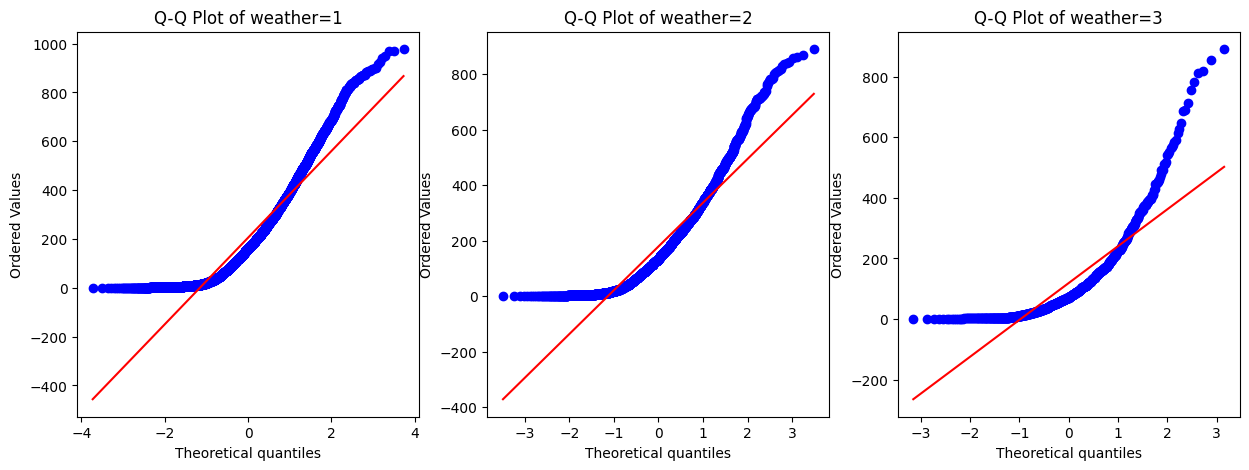

In [ ]:
# Checking normanlity
from scipy.stats import probplot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
probplot(a, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of weather=1')
plt.subplot(1,3,2)
probplot(b, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of weather=2')
plt.subplot(1,3,3)
probplot(c, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of weather=3')

In [ ]:
#Checking Variances
#H0:Variances are equal
#Ha:Variances are not equal

stats.levene(a,b,c)

LeveneResult(statistic=81.67574924435011,

pvalue=6.198278710731511e36)

• p_value is less than alpha we rejected null hypothesis for shapiro which says that the data is not following gaussian

• p_value is less than alpha we rejected null hypothesis for Levene which says that the Variances of the groups are not equal

• As it is not following normaity and variances are not equal we have to go for kruskal test but i'll do both f_oneway and kruskal

In [ ]:
##Testing with f_oneway
H0="Weather has no effect on count of bikes rented"
Ha="Weather has effect on count of bikes rented"
alpha=0.05
stat,p=stats.f_oneway(a,b,c)
print(stat)
print(p)
if p<alpha:
    print("reject H0 : So",Ha)
else:
    print("fail to reject H0 : So",H0)

98.28356881946706
4.976448509904196e-43
reject H0 : So Weather has effect on count of bikes rented


In [ ]:
#Testing with kruskal
H0="Weather has no effect on count of bikes rented"
Ha="Weather has effect on count of bikes rented"
alpha=0.05
stat,p=stats.kruskal(a,b,c)
print(stat)
print(p)
if p<alpha:
    print("reject H0 : So",Ha)
else:
    print("fail to reject H0 : So",H0)

204.95566833068537
3.122066178659941e-45
reject H0 : So Weather has effect on count of bikes rented


**Insights:**

• We have checked assumptions of normality and variances test from the test we came to know that the data is not following gaussian and their variances are also not equal

• So we need to go for kruskal but we have done both anova and kruskal test

• From those hypothesis testing we came to know that weather has effect on rental bike registrations,and the result is same for both f_oneway and kruskal tests


In [ ]:
#Test on season and count
##distributing data into groups
a=df_yulu[df_yulu["season"]==1]["count"]
b=df_yulu[df_yulu["season"]==2]["count"]
c=df_yulu[df_yulu["season"]==3]["count"]
d=df_yulu[df_yulu["season"]==4]["count"]

Text(0.5, 1.0, 'Q-Q Plot of season=3')

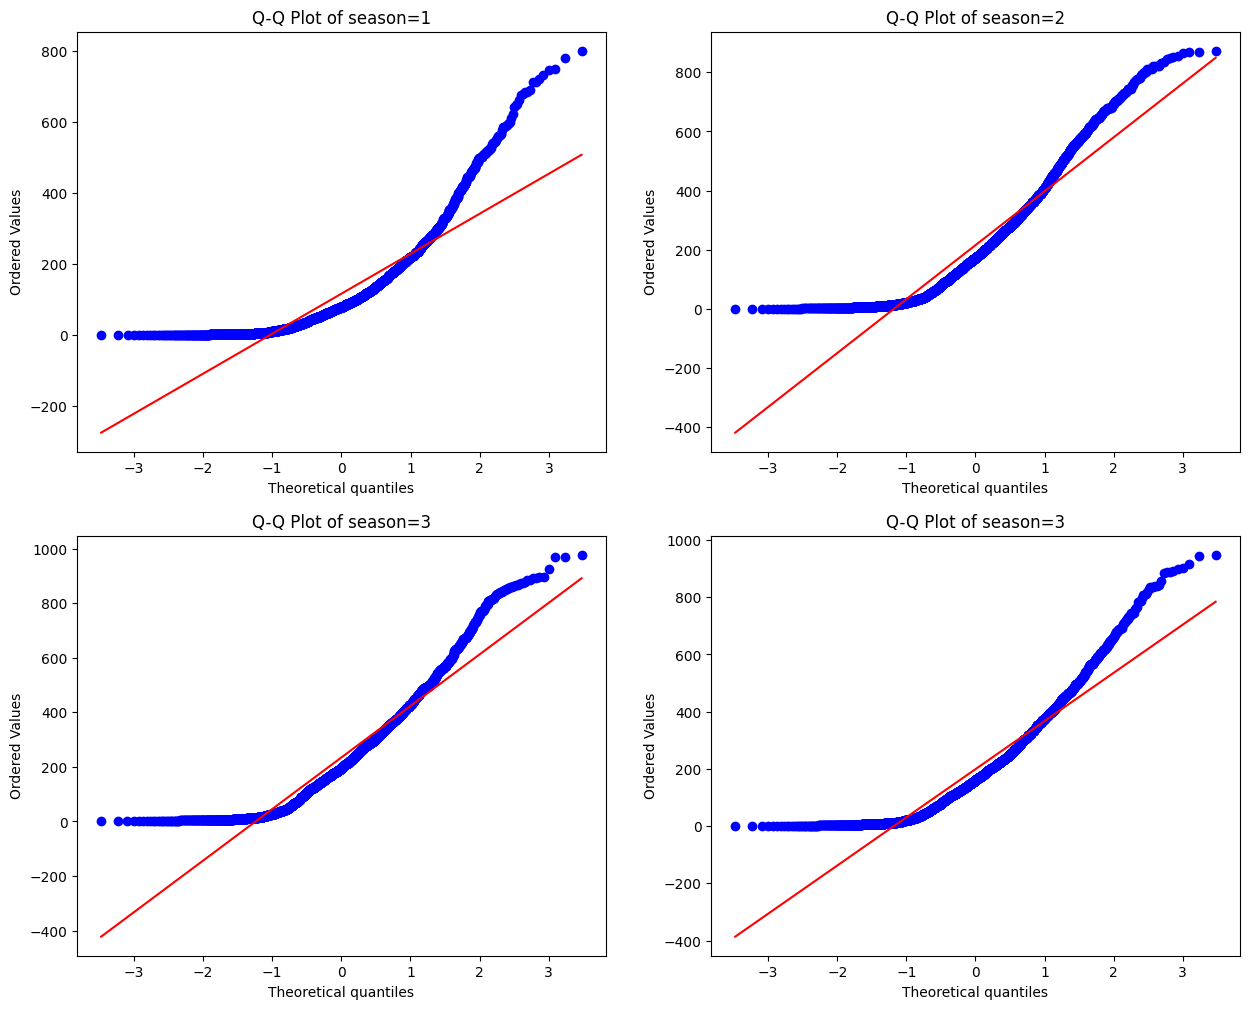

In [ ]:
# Checking normanlity
from scipy.stats import probplot
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
probplot(a, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of season=1')
plt.subplot(2,2,2)
probplot(b, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of season=2')
plt.subplot(2,2,3)
probplot(c, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of season=3')
plt.subplot(2,2,4)
probplot(d, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of season=3')

 p_value is less than alpha we rejected null hypothesis for shapiro which says
that the data is not following gaussian

• p_value is less than alpha we rejected null hypothesis for Levene which says that the Variances of the groups are not equal

• As it is not following normaity and variances are not equal we have to go for kruskal test but i'll do both f_oneway and kruskal


In [ ]:
##Testing with f_oneway
H0="Season has no effect on count of bikes rented"
Ha="Season has effect on count of bikes rented"
alpha=0.05
stat,p=stats.f_oneway(a,b,c,d)
print(stat)
print(p)
if p<alpha:
    print("reject H0 : So",Ha)
else:
    print("fail to reject H0 : So",H0)

236.94671081032106
6.164843386499654e-149
reject H0 : So Season has effect on count of bikes rented


In [ ]:
#Testing with kruskal
H0="Season has no effect on count of bikes rented"
Ha="Season has effect on count of bikes rented"
alpha=0.05
stat,p=stats.kruskal(a,b,c,d)
print(stat)
print(p)
if p<alpha:
    print("reject H0 : So",Ha)
else:
    print("fail to reject H0 : So",H0)

699.6668548181988
2.479008372608633e-151
reject H0 : So Season has effect on count of bikes rented


**Insights:**

• We have checked assumptions of normality and variances test from the test we
came to know that the data is not following gaussian and their variances are also not equal

• So we need to go for kruskal but we have done both anova and kruskal test

• from those hypothesis testing we came to know that Season has effect on count of bikes rented


In [ ]:
# Test on season and count
##distributing data into groups
jan=df_yulu[df_yulu["month"]==1]["count"]
feb=df_yulu[df_yulu["month"]==2]["count"]
mar=df_yulu[df_yulu["month"]==3]["count"]
apr=df_yulu[df_yulu["month"]==4]["count"]
may=df_yulu[df_yulu["month"]==5]["count"]
june=df_yulu[df_yulu["month"]==6]["count"]
july=df_yulu[df_yulu["month"]==7]["count"]
aug=df_yulu[df_yulu["month"]==8]["count"]
sep=df_yulu[df_yulu["month"]==9]["count"]
oct=df_yulu[df_yulu["month"]==10]["count"]
nov=df_yulu[df_yulu["month"]==11]["count"]
dec=df_yulu[df_yulu["month"]==12]["count"]

Text(0.5, 1.0, 'Q-Q Plot of dec')

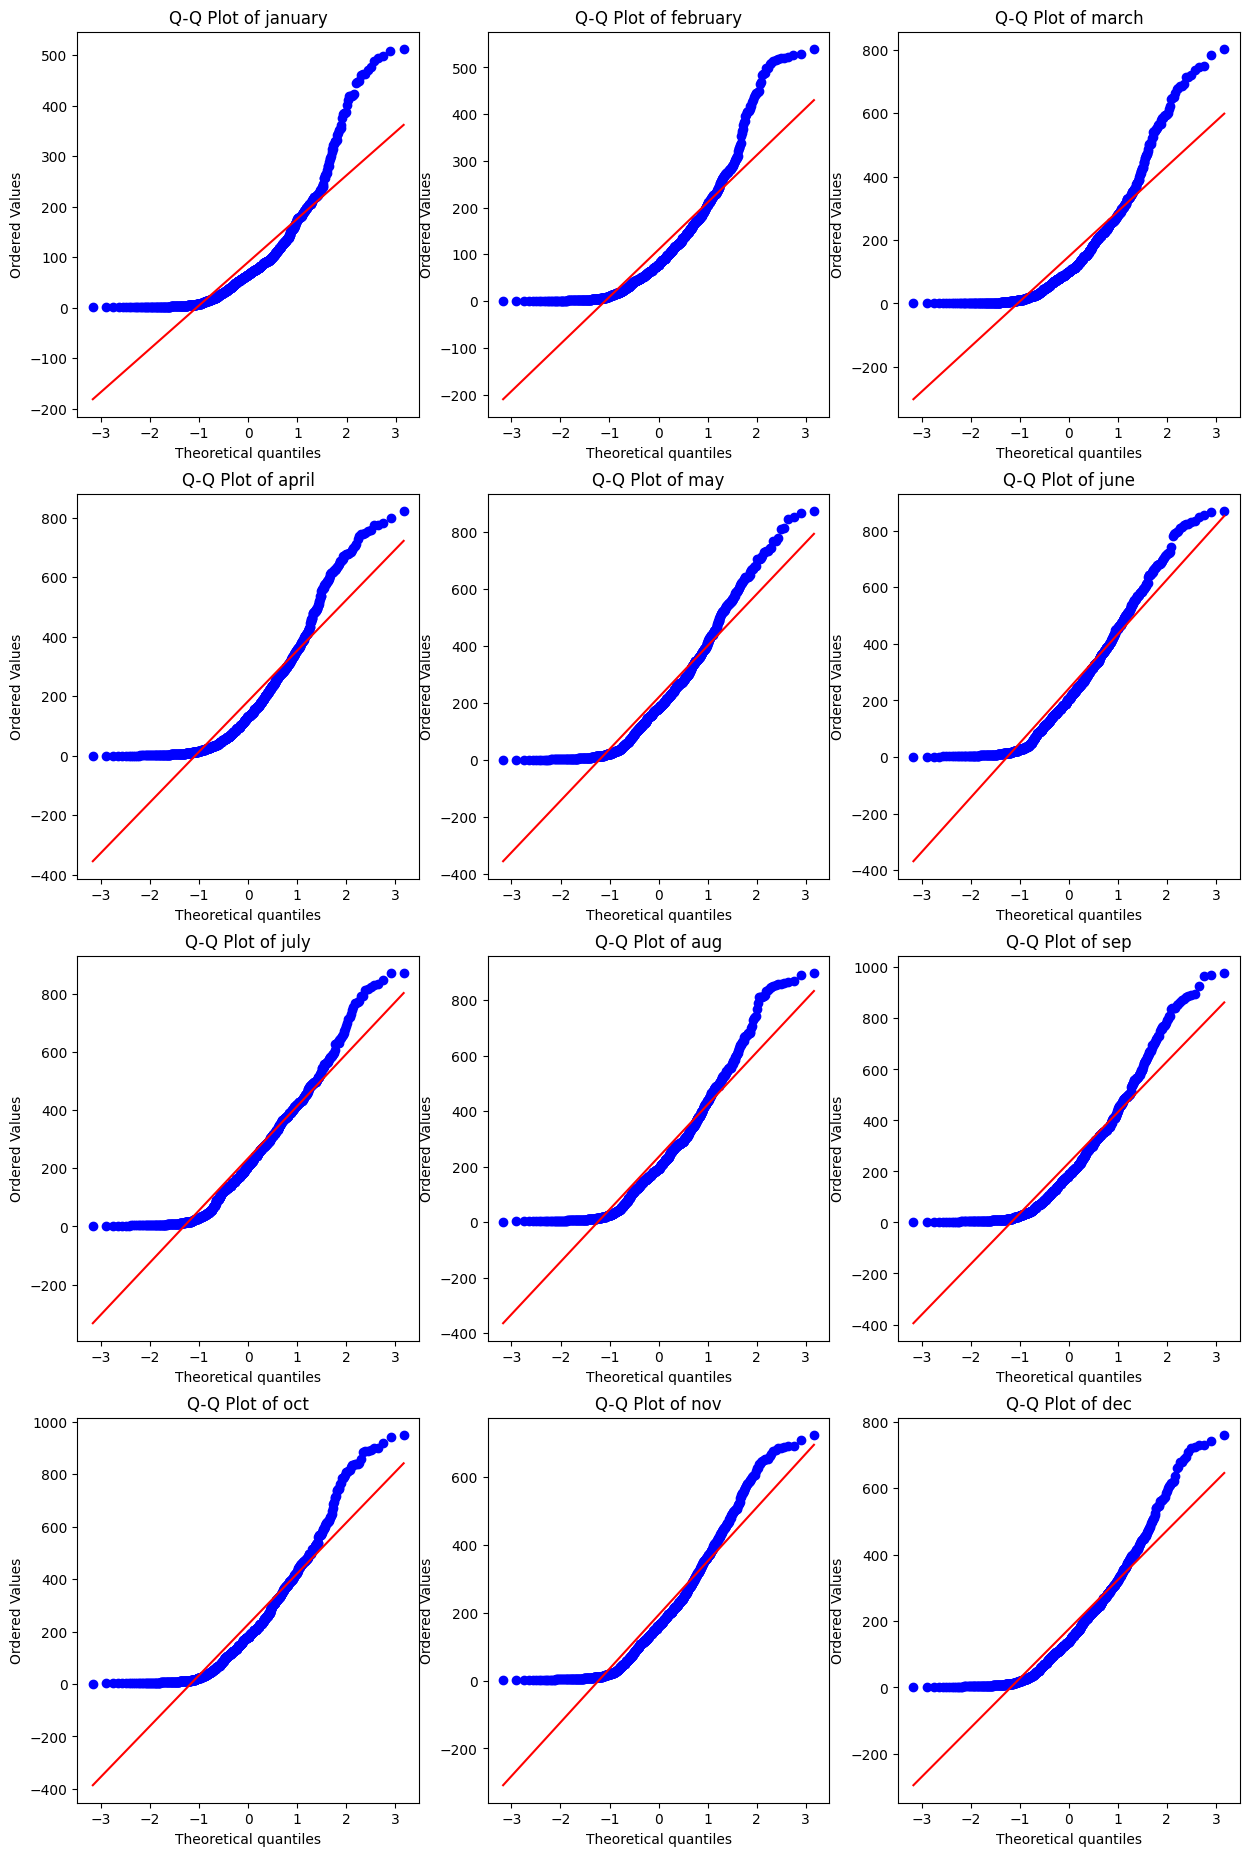

In [ ]:
#Checking normanlity
plt.figure(figsize=(15,23))
plt.subplot(4,3,1)
probplot(jan, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of january')
plt.subplot(4,3,2)
probplot(feb, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of february')
plt.subplot(4,3,3)
probplot(mar, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of march')
plt.subplot(4,3,4)
probplot(apr, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of april')
plt.subplot(4,3,5)
probplot(may, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of may')
plt.subplot(4,3,6)
probplot(june, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of june')
plt.subplot(4,3,7)
probplot(july, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of july')
plt.subplot(4,3,8)
probplot(aug, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of aug')
plt.subplot(4,3,9)
probplot(sep, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of sep')
plt.subplot(4,3,10)
probplot(oct, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of oct')
plt.subplot(4,3,11)
probplot(nov, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of nov')
plt.subplot(4,3,12)
probplot(dec, dist='norm', plot=plt)
plt.title(f'Q-Q Plot of dec')

In [ ]:
##Testing with f_oneway
H0="Month has no effect on count of bikes rented"
Ha="Month has effect on count of bikes rented"
alpha=0.05
stat,p=stats.f_oneway(jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec)
print(stat)
print(p)
if p<alpha:
 print("reject H0 : So",Ha)
else:
 print("fail to reject H0 : So",H0)

78.48339105291323
3.9670124592025475e-171
reject H0 : So Month has effect on count of bikes rented


In [ ]:
#Testing with kruskal
H0="Month has no effect on count of bikes rented"
Ha="Month has effect on count of bikes rented"
alpha=0.05
stat,p=stats.kruskal(jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec)
print(stat)
print(p)
if p<alpha:
 print("reject H0 : So",Ha)
else:
 print("fail to reject H0 : So",H0)

825.77155876417
5.534901654936772e-170
reject H0 : So Month has effect on count of bikes rented


**Insights:**

• We have checked assumptions of normality and variances test from the test we
came to know that the data is not following gaussian and their variances are also not equal

• So we need to go for kruskal but we have done both anova and kruskal test

• from those hypothesis testing we came to know that Month has effect on count of bikes rented


In [ ]:
#Chisquare test for category vs category
H0="season and weather are not associated"
Ha="season and weather are associated"
a=pd.crosstab(df_yulu["season"],df_yulu["weather"])
stat,p,dof,exp=stats.chi2_contingency(a)
alpha=0.05
print(stat)
print(p)
if p<alpha:
 print("reject H0 : So",Ha)
else:
 print("fail to reject H0 : So",H0)

49.158655596893624
1.549925073686492e-07
reject H0 : So season and weather are associated


In [ ]:
H0="season and workingday are not associated"
Ha="season and workingday are associated"
a=pd.crosstab(df_yulu["season"],df_yulu["workingday"])
stat,p,dof,exp=stats.chi2_contingency(a)
alpha=0.05
print(stat)
print(p)
if p<alpha:
 print("reject H0 : So",Ha)
else:
 print("fail to reject H0 : So",H0)

2.5708953973429574
0.4626148207703564
fail to reject H0 : So season and workingday are not associated


In [ ]:
H0="weather and workingday are not associated"
Ha="weather and workingday are associated"
a=pd.crosstab(df_yulu["weather"],df_yulu["workingday"])
stat,p,dof,exp=stats.chi2_contingency(a)
alpha=0.05
print(stat)
print(p)
if p<alpha:
 print("reject H0 : So",Ha)
else:
 print("fail to reject H0 : So",H0)

16.16251872527659
0.0010502165960627754
reject H0 : So weather and workingday are associated


**Insights:**

From the test we came to know that

• season and weather are associated

• weather and workingday are associated

• season and workingday are not associated


**Correlation test**


<Axes: xlabel='atemp', ylabel='count'>

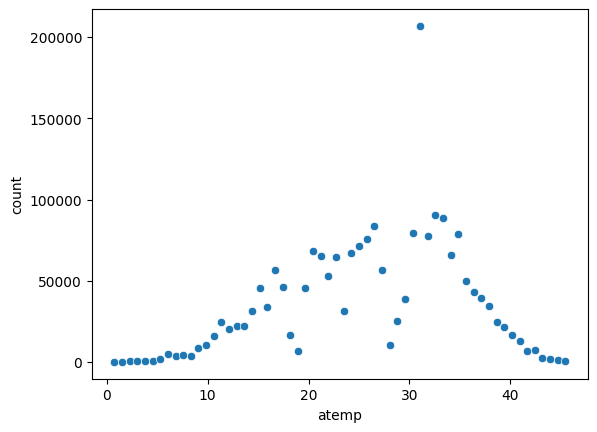

In [ ]:
grouped_df = df_yulu.groupby("atemp")["count"].sum().reset_index()
grouped_df
sns.scatterplot(x="atemp",y="count",data=grouped_df)

<Axes: xlabel='temp', ylabel='count'>

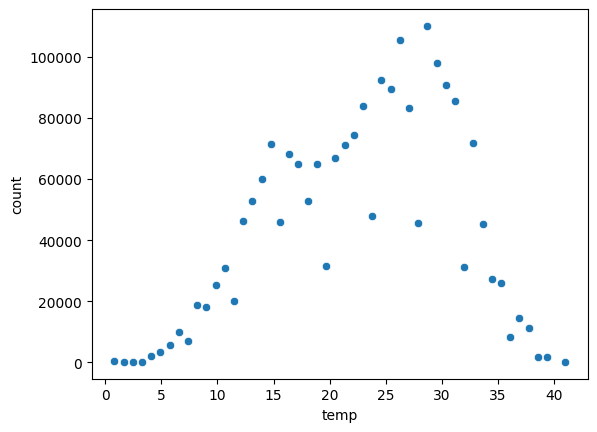

In [ ]:
grouped_df = df_yulu.groupby("temp")["count"].sum().reset_index()
grouped_df
sns.scatterplot(x="temp",y="count",data=grouped_df)

**Insights:**

• We can see that count of bikes rented is mostly when the actual temp is between [20-35] is seen

• We can see that count of bikes rented is mostly when the feeling temp is between [20-30] is seen

• In the pairplot we can only see that actual [temperature, temperature] and
[regestered,count] have the positive correlation

• And for casual and regIstered we can see some positive correlation

**Business insights**

**1) Based on distribution of data (Univariate analysis)**

• The data of holiday is evenly distributed as we can see the % of data is almost 25 for each group

• for weekday 31.9% data is present and remaining percentage is of weekend or
holiday

• based on weather we can see only 1 row is present which is negligible so we
removed that row for doing our hypothesis testing

• For holiday most of the data is of not holiday only 2.9% data is of a holiday

• We can see that the year 2011 and 2012 has approximately equal data 50%

• Even if we see the month the data distribution is almost equal of 8.4%

**2) Based on Bivariate analysis**

• Most of the bikes rented in the month range of [may-october] and we can see that very less bikes rented in january comparing to other months

• most bikes rented in 2012 than 2011 which tells us the improvement of business

• Mostly bikes are rented in the evening [4-7]PM and in morning[7-9]AM

• When the weather is clear most of the bikes are rented when the climate getting towards rain the rented bikes count is going down

• Mostly working day and non working day has almost same count of rented bikes
even it is followed in holiday or weekday also

• [30-36] degree celcius most of the rent bikes count is there

**3)Based on ttest**

• from the test we came to know that working day has no effect of number of vehicels rented on yulu bikes

• coming to the year and count of bikes rented year has effect of number of vehicels rented on yulu bikes

• And for holiday and no of bikes rented, Holiday has no effect of number of vehicels rented on yulu bikes

**4)Based on Anova & Kruskal tests**

• In all these tests no data is followed the normality test and levene test but i used both f_oneway and kruskal

• From those hypothesis testing we came to know that weather has effect on count of bikes rented,and the result is same for both f_oneway and kruskal tests

• Season has effect on count of bikes rented

• Month has effect on count of bikes rented

**5)Based on chisquare test**

• From the test we came to know that

• season and weather are associated

• weather and workingday are associated

• season and workingday are not associated

**6)Based on correlation test**

• We can see that count of bikes rented is mostly when the actual temp is between [20-35] is seen

• We can see that count of bikes rented is mostly when the feeling temp is between [20-30] is seen

• In the pairplot we can only see that actual [temperature, temperature] and
[regestered,count] have the positive correlation

• And for casual and regIstered we can see some positive correlation

**Recommendations**

• As most of the bikes rented in may to october need to improve remaining months by some offers or advertisements

• It is good to see the improvement from 2011 to 2012 so just follow some of the
business tactics that implemented for improvement and which are crucial

• as mostly bikes are rented in morning and evening need to focus on afternoons also so advertise more and get attenction of new customers which may fill the afternoon slots also

• As mostly bikes are rented when temperature is around 30-36 so it may be good to implement the top close which will improve the bikerent counts even in sunny or rainy times.

• In ttest we saw that working day has no effect on no of rented bikes which says that the customers who used to use yulu bikes are addicted to use so for improvment we need to focus on new costomers so implement offers for a new regestered uses which will be good

• from ttest holiday also has no effect on no of bikes rented so focussing on new customers will be helpfull

• From anova and kruskal test we can see that Season and weather has effect on count of bikes rented so in order to improve bike rents it is good to implement closed top on bikes.

• from the anova and kruskal test we can also see that Month has effect on count of bikes rented we have observed this in bivariate analysis also as january we can see very less bikes rented so we have to advertise or monthly bonus implementation will help to improve the results

• From chisquare we can see that season and weather are associated and we can say that decesions can be made based on the seasons or weather

• From correlation also we can see some positive correlation for regestered and count we can say that regestered people are more oftenly taking the bike for rent so try to attract casual users also for making them to regester by explaining the bonuses for regestration.